## Loading Data

In [2]:
import seaborn as sns
import numpy as np
iris = sns.load_dataset('iris')
iris.shape


(150, 5)

In [99]:
iris = iris[:100]
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,versicolor
96,5.7,2.9,4.2,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor
98,5.1,2.5,3.0,1.1,versicolor


In [71]:
Y = iris.species
Y = Y[0:100]
count = 0
while count != len(Y):
    if Y[count] == 'setosa':
        Y[count] = 1
    else:
        Y[count] = -1
    count += 1

In [72]:
X = iris.drop('species', axis = 1)
X = X[0:100]

In [73]:
X2 = X.drop('petal_length', axis = 1)
X2 = X2.drop('petal_width', axis = 1)

In [74]:
X = X.to_numpy()
Y = Y.to_numpy()
X2 = X2.to_numpy()
Y = Y.astype(np.double)

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X2, Y, test_size = 0.3, random_state = 44)

### Thus, we take iris[0:100]
### Now, we move to Primal SVM

In [76]:
import cvxopt
import matplotlib.pyplot as plt

### cvxopt.solvers.qp(P, q, G, h, A, b)
this is given by documentation. We will initialise these objects to further calculate

In [77]:
def svm_function(X, Y):
    
    n = X.shape[0]
    d = X.shape[1]

    P = np.zeros((d + 1, d + 1))
    P[1:, 1:] = np.eye(d)
    P_cvxopt = cvxopt.matrix(P)
    
    q_temp = np.zeros(d + 1)
    q = cvxopt.matrix(q_temp)
    
    new_y = np.reshape(Y, (-1, 1))
    temp_matrix = -np.insert(X, 0, np.ones(n), axis = 1) * new_y
    G_cvxopt = cvxopt.matrix(temp_matrix)
    
    h_temp = -np.ones(n)
    h = cvxopt.matrix(h_temp)
    
    calculate = cvxopt.solvers.qp(P_cvxopt, q, G_cvxopt, h)
    
    return calculate

In [78]:
solution = svm_function(X_train, Y_train)

     pcost       dcost       gap    pres   dres
 0:  1.1477e+00  3.5176e+01  2e+02  2e+00  5e+01
 1:  7.3095e+00 -1.9702e+01  8e+01  8e-01  2e+01
 2:  1.9093e+01 -1.0546e+01  7e+01  4e-01  1e+01
 3:  3.1620e+01  1.5828e+01  2e+01  1e-01  3e+00
 4:  3.3561e+01  3.2481e+01  2e+00  7e-03  2e-01
 5:  3.3793e+01  3.3781e+01  2e-02  7e-05  2e-03
 6:  3.3795e+01  3.3795e+01  2e-04  7e-07  2e-05
 7:  3.3795e+01  3.3795e+01  2e-06  7e-09  2e-07
 8:  3.3795e+01  3.3795e+01  2e-08  7e-11  2e-09
Optimal solution found.


In [79]:
b_and_w = np.array(solution['x'])

In [80]:
b = b_and_w[0][0]
w = b_and_w[1:] 

In [81]:
w.shape

(2, 1)

In [82]:
b

17.315789473215457

In [83]:
w

array([[-6.31578947],
       [ 5.26315789]])

In [85]:
def plot_svm_graph(W, X, Y, b):
    i = 0
    while i != len(X):
        if Y[i] > 0:
            plt.scatter(X[i, 0], X[i,1], color = 'b')
        else:
            plt.scatter(X[i, 0], X[i,1], color = 'r')
        i += 1
    x_plot = np.arange(4.5, 6.5, 0.25)
    y_predict = -(b + x_plot*W[0])/W[1]
    distance = 1/np.linalg.norm(W)
    upper_margin = y_predict + distance
    lower_margin = y_predict - distance
    
    plt.plot(x_plot, y_predict)
    plt.plot(x_plot, upper_margin)
    plt.plot(x_plot, lower_margin)
    plt.legend(('predicted', 'upper_margin', 'lower_margin'))
    plt.show()


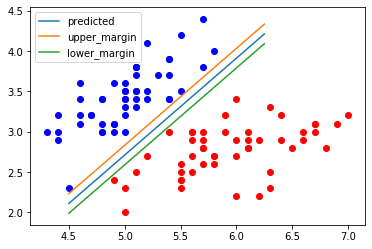

In [86]:
plot_svm_graph(w, X, Y, b)

## We now implemented a prime SVM

We now see that margins touch support-vector, which can show that our SVM was implemented correctly!



## Dual SVM


In [100]:
def dual_svm_function(X, Y):
    
    n = X.shape[0]
    d = X.shape[1]
    
    new_y = Y.reshape(-1, 1)
    X_star = new_y * X
    
    P = np.dot(X_star, X_star.T)
    P_cvxopt = cvxopt.matrix(P)
    
    q = -np.ones(n)
    q_cvxopt = cvxopt.matrix(q)
    
    G = -np.eye(n)
    G_cvxopt = cvxopt.matrix(G)
    
    h = np.zeros(n)
    h_cvxopt = cvxopt.matrix(h)
    
    new_new_y = new_y.reshape(1, -1)
    A_cvxopt = cvxopt.matrix(new_new_y)
    
    b = np.zeros(1)
    b_cvxopt = cvxopt.matrix(b)
    
    alpha = cvxopt.solvers.qp(P_cvxopt, q_cvxopt, G_cvxopt, h_cvxopt, A_cvxopt, b_cvxopt)
    return alpha


In [101]:
alpha = dual_svm_function(X_train, Y_train)

     pcost       dcost       gap    pres   dres
 0: -1.3152e+01 -2.9334e+01  2e+02  1e+01  2e+00
 1: -2.4030e+01 -3.1555e+01  8e+01  5e+00  8e-01
 2: -4.5492e+01 -4.7648e+01  7e+01  3e+00  4e-01
 3: -3.5515e+01 -3.9020e+01  2e+01  7e-01  1e-01
 4: -3.3809e+01 -3.4043e+01  2e+00  5e-02  7e-03
 5: -3.3795e+01 -3.3798e+01  2e-02  5e-04  7e-05
 6: -3.3795e+01 -3.3795e+01  2e-04  5e-06  7e-07
 7: -3.3795e+01 -3.3795e+01  2e-06  5e-08  7e-09
Optimal solution found.


In [102]:
alpha = np.array(alpha['x'])
alpha = alpha.flatten()

In [103]:
print(alpha)

[-1.37241951e-09 -4.51206777e-10 -1.40261809e-09  1.22792530e-08
  1.03388738e-09  1.52094251e-09  1.94801815e-08  1.24650800e-08
 -1.15166879e-09 -7.85326928e-10 -2.03928588e-09  6.22986671e-11
  4.20643295e-09  2.61646877e-10 -1.02847517e-09  1.03388738e-09
 -1.58991900e-09  6.22986671e-11 -2.81419941e-10 -2.08059060e-09
 -6.86098112e-10 -1.54611472e-09 -2.10648297e-09  2.86549963e-09
  3.05709526e-09 -3.57629990e-10  1.43886968e+01 -8.84547399e-10
  1.84591200e-09  2.55649028e-10  3.05709526e-09  2.38525393e-09
 -1.42754825e-09 -7.62621092e-10 -4.80312991e-10  2.57177933e-09
 -1.08482888e-09  8.68615062e-10 -4.80312991e-10 -6.08074673e-10
 -2.10038047e-09 -1.12331850e-09 -1.96036756e-09  8.91472244e-10
 -3.57629990e-10 -2.04225921e-09  8.87170622e-10 -2.11322629e-09
 -1.17012245e-10  4.80231777e-07 -5.61160216e-10 -1.83313489e-09
  1.94063160e+01 -1.51824396e-09  5.90669439e-09  9.38681203e+00
  1.32827466e-09 -1.40261809e-09 -5.61160216e-10  2.22181571e-10
 -1.88117333e-09  8.17230

In [104]:
w = np.matmul((alpha * Y_train).T, X_train)

In [105]:
w

array([-6.31578945,  5.26315787])

In [106]:
# our support vectors
i = 0
sv_indexes = []
while i != len(alpha):
    if alpha[i] >= 1e-7:
        sv_indexes.append(i)
    i += 1

In [107]:
b = Y_train[sv_indexes[0]] - np.matmul(w.T, X_train[sv_indexes[0]])

In [108]:
b

17.31578942920447

In [109]:
def plot_dual_svm_graph(W, X, Y, b, alpha):
    i = 0
    while i != len(X):
        if Y[i] > 0:
            plt.scatter(X[i, 0], X[i,1], color = 'b')
        else:
            plt.scatter(X[i, 0], X[i,1], color = 'r')
        i += 1
    x_plot = np.arange(4.5, 6.5, 0.25)
    y_predict = -(b + x_plot*W[0])/W[1]
    distance = 1/np.linalg.norm(W)
    upper_margin = y_predict + distance
    lower_margin = y_predict - distance
    
    plt.plot(x_plot, y_predict)
    plt.plot(x_plot, upper_margin)
    plt.plot(x_plot, lower_margin)
    i = 0
    while i != len(X):
        if alpha[i] >= 1e-7:
            plt.scatter(X[i, 0], X[i,1], color = 'y', label = 'support-vectors')
        i += 1
    plt.legend(('predicted', 'upper_margin', 'lower_margin'))
    plt.show()


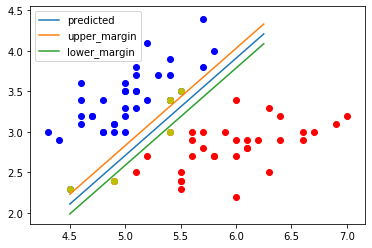

In [110]:
plot_dual_svm_graph(w, X_train, Y_train, b, alpha)